# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [188]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

In [189]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [190]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [191]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [192]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [193]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
#for i in rows :
# i = rows[0]
# i.find_all("td")
column_names = ['id','terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

for row in rows:
    cells = row.find_all('td')
    row_data = [cell.get_text(strip=True) for cell in cells]
    data.append(row_data)




In [194]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mtd_df = pd.DataFrame(data, columns=column_names)


In [195]:
# Confirm DataFrame was created successfully
mtd_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [196]:
# Examine data type of each column
mtd_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [197]:
# Change data types for data analysis
mtd_df['id'] = mtd_df['id'].astype(object)
mtd_df['terrestrial_date'] = pd.to_datetime(mtd_df['terrestrial_date'])
mtd_df['sol'] = mtd_df['sol'].astype(int)
mtd_df['ls'] = mtd_df['ls'].astype(int)
mtd_df['month'] = mtd_df['month'].astype(int)
mtd_df['min_temp'] = mtd_df['min_temp'].astype(float)
mtd_df['pressure'] = mtd_df['pressure'].astype(float)

In [198]:
# Confirm type changes were successful by examining data types again
mtd_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [199]:
# 1. How many months are there on Mars?
total_months = mtd_df['month'].nunique()
print("Total number of months on Mars:", total_months)

Total number of months on Mars: 12


In [200]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = mtd_df['sol'].nunique()
print("Total number of sols (Martian Days) worth of data:", total_sols)

Total number of sols (Martian Days) worth of data: 1867


In [201]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mtd_df.groupby('month')['min_temp'].mean()
print("The average minimum temperature by:", avg_min_temp_by_month)

The average minimum temperature by: month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


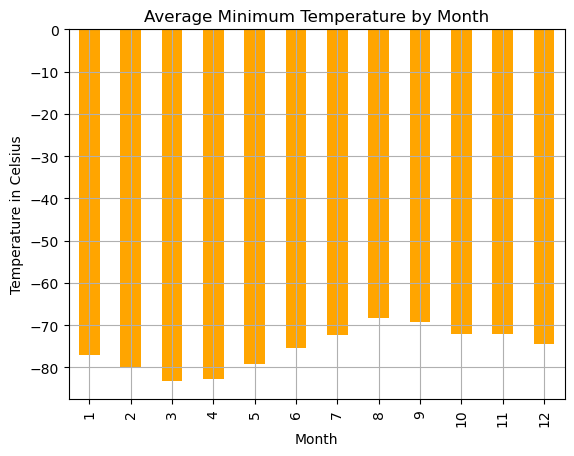

In [202]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', color='orange')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.grid(True)
plt.show()

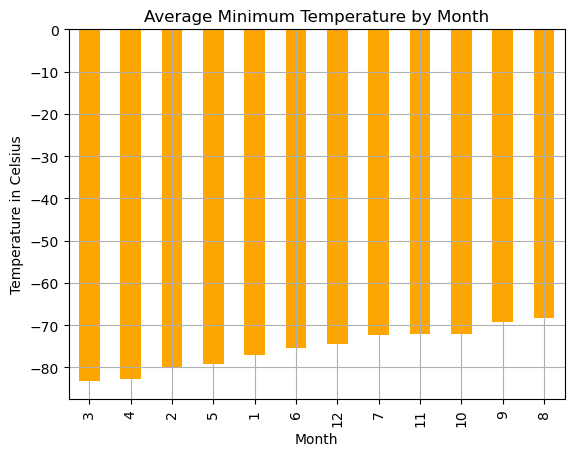

In [203]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_by_month.sort_values().plot(kind='bar', color='orange')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.grid(True)
plt.show()



In [204]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mtd_df.groupby('month')['pressure'].mean()
print("The average pressure by:", avg_pressure_by_month)

The average pressure by: month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


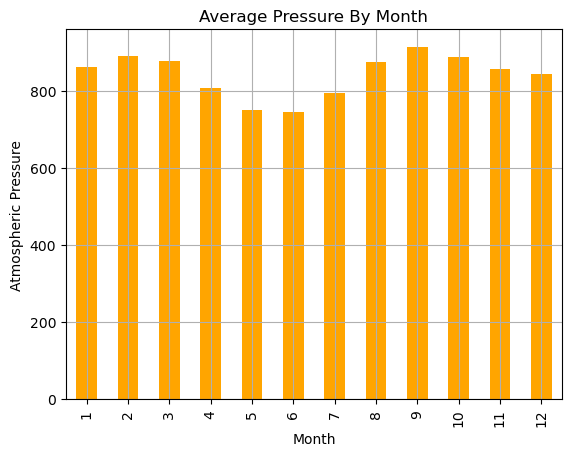

In [205]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', color='orange')
plt.title('Average Pressure By Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.grid(True)
plt.show()

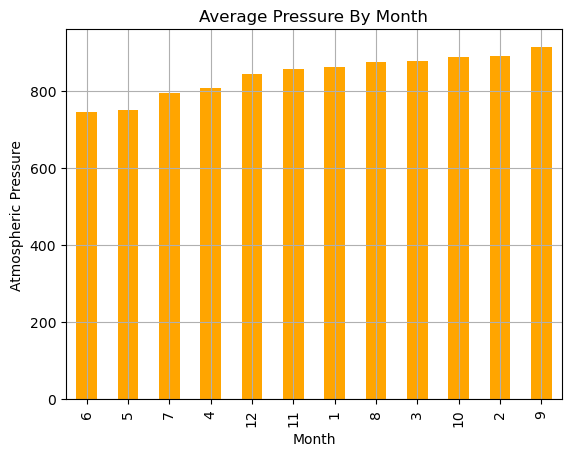

In [206]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_by_month.sort_values().plot(kind='bar', color='orange')
plt.title('Average Pressure By Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.grid(True)
plt.show()

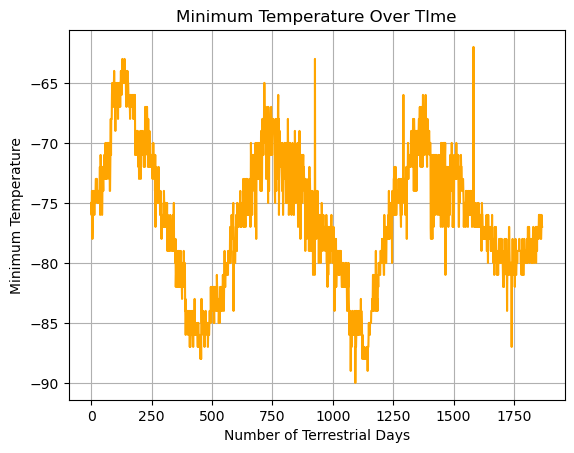

In [207]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mtd_df['min_temp'].plot(color = 'orange')
plt.title('Minimum Temperature Over TIme')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.grid(True)
plt.show()


#### Minimum Temperature

The average temperature on Mars is extremely cold. The average temperature reaches -80 degrees celcius in just the third month of the year. While the warmest on average temperature is on the eighth month where the temperature is in the -60's degree celcius. Making it inhabitable for humans to exist on the planet without any equipment that would help keep us warm. 

#### Atmospheric Pressure

It looks like the average atmospheric pressure fluctuates month to month. The highest monthly pressure is on the 9th month of the year over 800. The lowest is is on the 6th month of the year in the 700's atmospheric pressure. Definitely stays between an atmospheric pressure between 700 and 900.

#### Year Length

The length of a year on Mars is 687 terrestrial days. That is about a year and 9 months on Earth for Mars to complete one orbital period. The days over time depict the fluctuations of the minimum temp thoroughout the year showing that the minimum temperature stays within -50 degrees to -90 degrees celcius. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [208]:
# Write the data to a CSV
mtd_df.to_csv('output.csv', index= False)

In [209]:
browser.quit()